# EP1


# PSI3431 - Processamento Estatístico de Sinais
# **Exercício Computacional 1** - Processos Estocásticos

# Alunos -----------------------------------------------------
# Cezar Gabriel M. A. Lima - 11806980 <br>
#Lucas Harada - 11449492
#------------------------------------------------------------------

In [ ]:
import numpy as np
import math
from IPython.display import Audio
import matplotlib.pyplot as plt
import scipy

Considere o sinal

$$ x_0 (t) =  sin^3(\Omega t)e^{\frac{-t}{\tau}}, t \ge 0  \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ 0, \ caso \ contrário $$ 

Primeiro, decalaramos as variáveis dadas no enunciado:

In [ ]:
omega = 2*np.pi*500
tau = 0.5
fa = 40*10**3
T = 2
N = T*fa
n = np.linspace(0, 2, N)

x0 = np.zeros(N)
for i in range(len(n)): # Preenchendo o xo
  x0[i] = ((math.sin(omega*n[i]))**3)*np.e**(-n[i]/tau)


Qual é o comprimento de $ x_0[n] $?


Sendo $x_0$ um sinal discreto, o seu comprimento total é dado pela amostragem $$N = T* fa  = 2 * 40* 10^3 = 80.000 $$ 

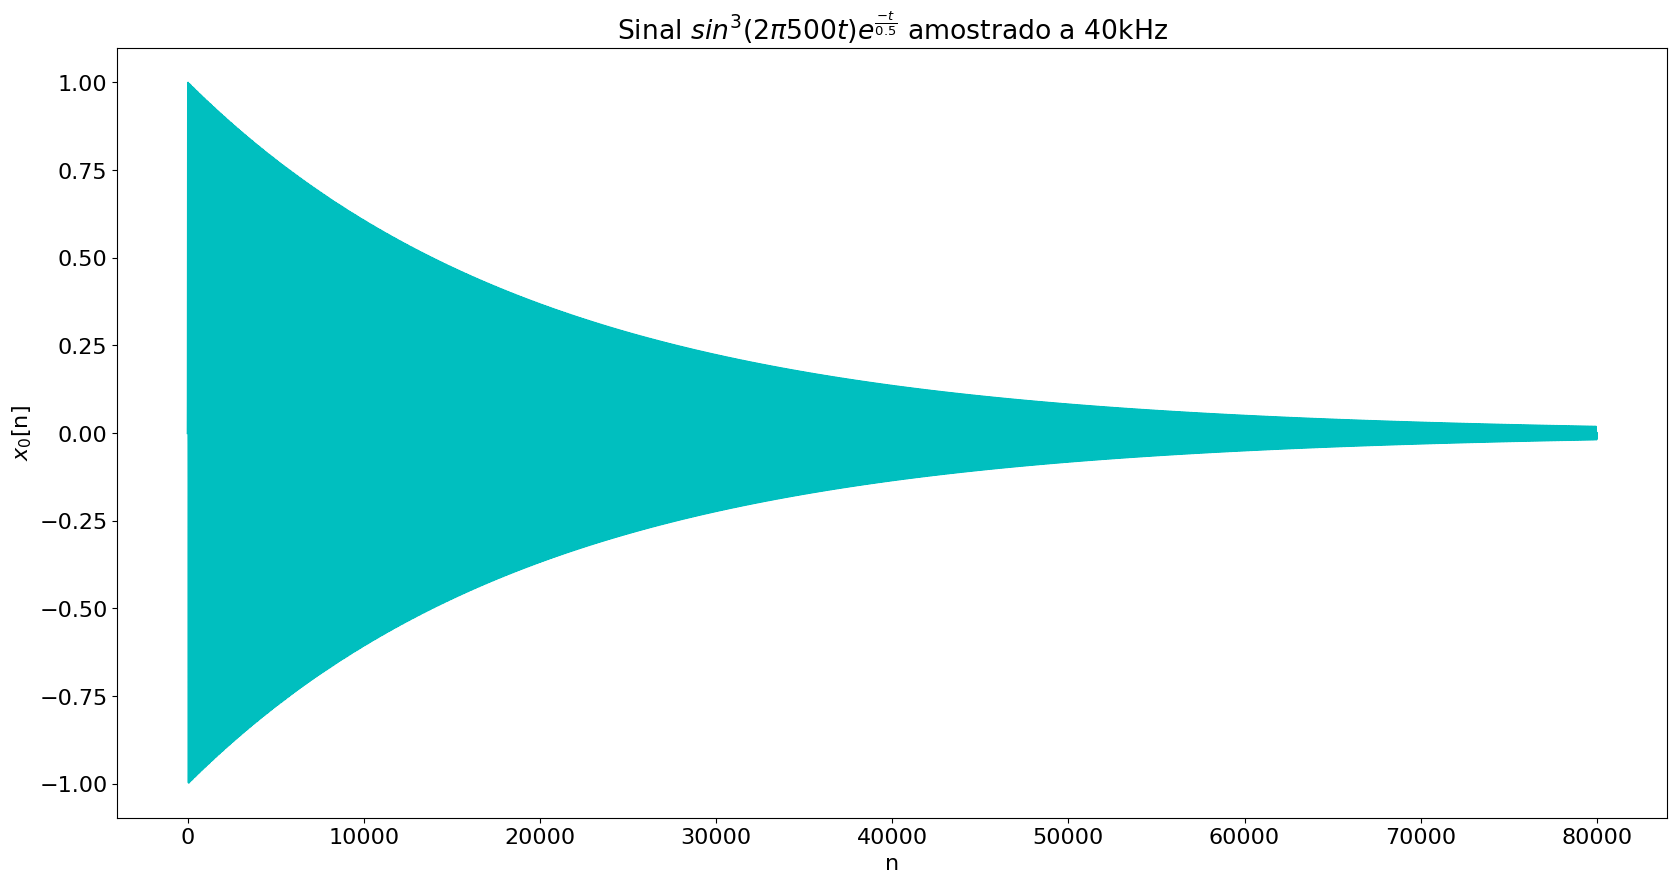

In [ ]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 16})
plt.title(r"Sinal $sin^3(2\pi500 t)e^{\frac{-t}{0.5}}$ amostrado a 40kHz")

plt.plot(range(N), x0, color='c')  

plt.ylabel(r'$x_0$[n]')
plt.xlabel("n")

plt.show()

## Item a)

**Item a:** Ouça o sinal

In [ ]:
# a)
Audio(x0, rate=40000, autoplay=True)


##Item b)

**Item b:** Adicione um ruído branco gaussiano de forma que x[n] tenha SNR igual a 10dB

Mostre no mesmo gráfico o sinal ruidoso e o sinal sem ruído.

Ouça o sinal

$$ P = \frac{1}{N} \sum_{n=0}^{N-1} x_0^2[n] $$

Para o cálculo do ruído branco com as condições especificadas no problema, fizemos os seguintes passos:

1) Recalculamos o SNR que estava em dB e achamos a variância do sinal:
  $$ SNR_{dB} = 10*log_{10}(SNR)  \rightarrow SNR = 10^{\frac{SNR_{dB}}{10}}$$
   $$  SNR = \frac{E[S^2]}{E[N^2]} $$
2) Como estamos tratando de um ruído branco gaussiano, o valor esperado da função é zero e, portanto, podemos reescrever a equação como:

   $$  SNR = \frac{E[S^2]}{\sigma^2} \rightarrow SNR = \frac{E_{x0}^2}{\sigma^2} $$

  $$  \sigma = \sqrt{\frac{E_{x0}^2}{SNR}}$$

3) De modo que possuimos um ruído $$ X = N_{(0,\sigma)}$$
  

In [ ]:
SNRdb = 10
SNR = 10**(SNRdb/10)

SNRdb = 10
SNR = 10**(SNRdb/10)

X = np.zeros(N)

var = np.sqrt(np.mean(x0**2)/SNR)
for n in range(1, (N - 1)):
    X[n] = np.random.normal(loc=0.0, scale=var )  #Scale é o desvio padrao


In [ ]:
x = np.add(X,x0)

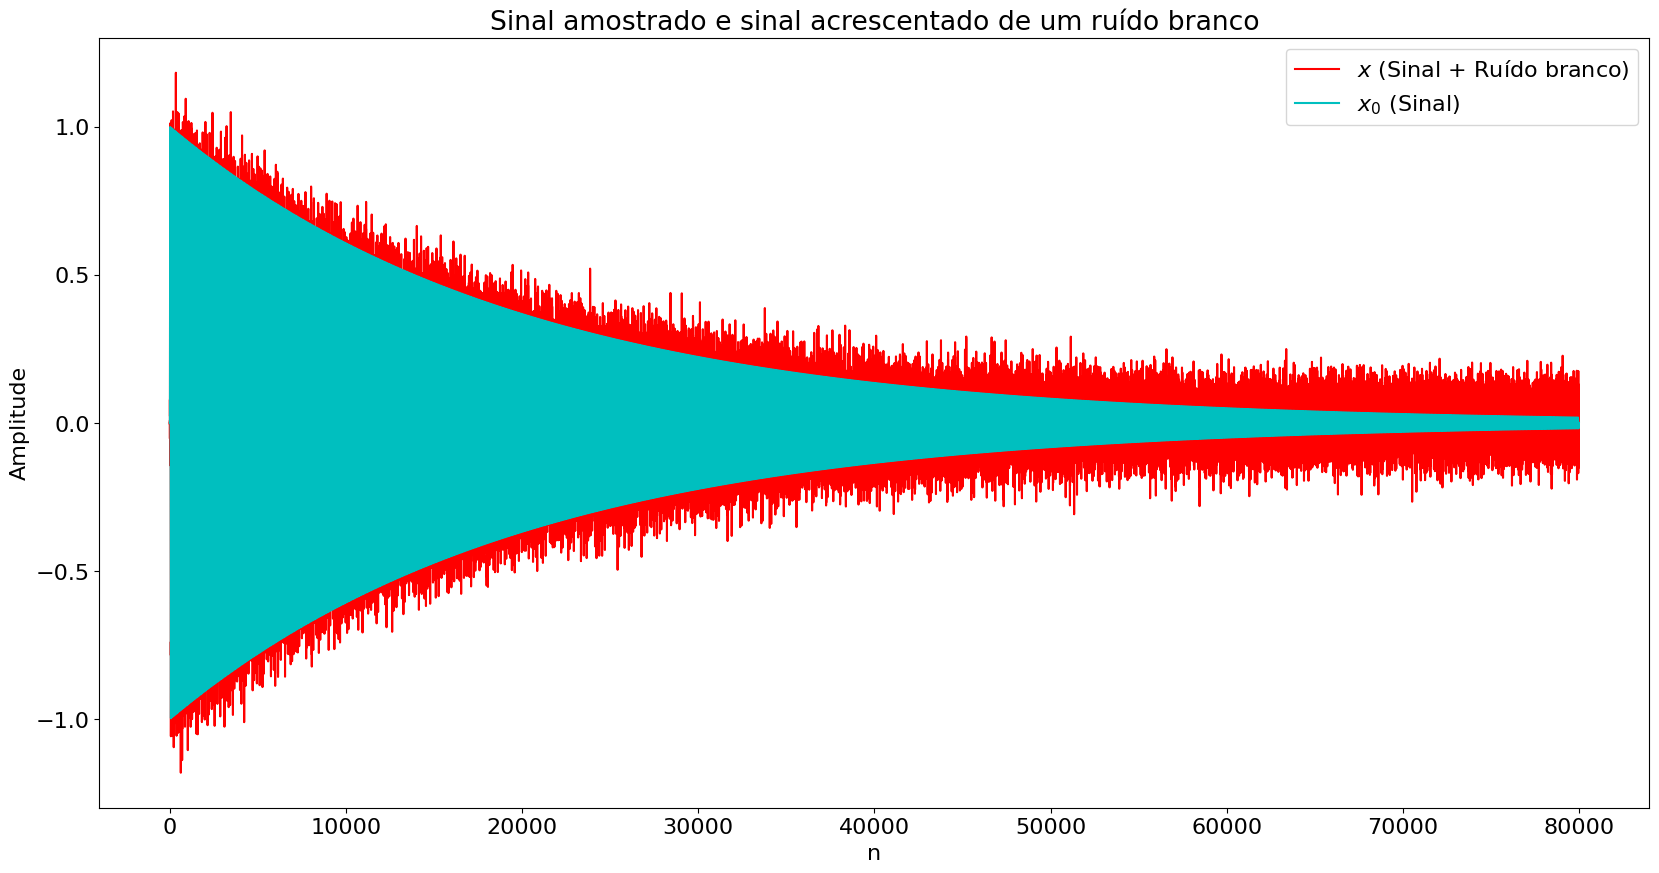

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(range(N), x, color='r', label=r"$x$ (Sinal + Ruído branco)")
plt.plot(range(N), x0, color='c', label=r"$x_0$ (Sinal)")
plt.rcParams.update({'font.size': 16})
plt.title(r"Sinal amostrado e sinal acrescentado de um ruído branco")

plt.ylabel(r'Amplitude')
plt.xlabel("n")
plt.legend()

plt.show()

Áudio com o ruído branco gaussiano adicionado:

In [ ]:
Audio(x, rate=40000, autoplay=True)

Nota-se auditivamente um "chiado" ao fundo do som original, semelhante ao som de TVs analógicas quando o sinal é mal recebido. 

## Item c)

**c** Considere o filtro com resposta ao impulso h[n] = 0.1sinc(0.1(n-50)) para 0=< n =< 100 e 0 caso contrário

Plote a resposta em frequencia deste filtro

(use o comando freqz)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


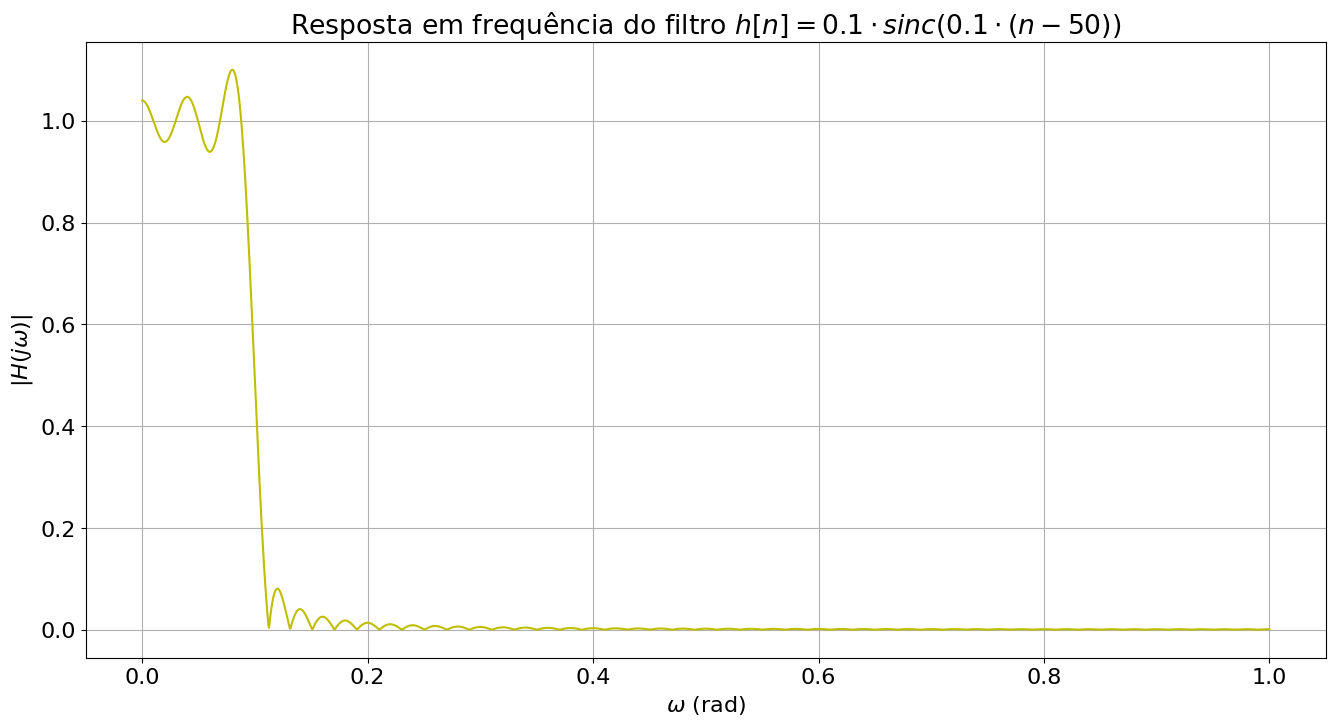

In [ ]:
import numpy as np
from scipy import signal
from scipy.signal import freqz
import matplotlib.pyplot as plt

N = 100
n = np.arange(0, 101) # Cria um array de 0 a 100
h = 0.1 * np.sinc(0.1 * (n - 50)) # Calcula os valores de h
w1 = np.linspace(0, np.pi, num=2000) # Cria um array de 0 a pi com 2000 pontos


hf = signal.TransferFunction(h, [1])

w, H = freqz(hf.num, hf.den, worN=w1) # Calcula a resposta em frequência


# --------- Grafico ---------
plt.figure(figsize=(16, 8))
plt.xlabel(r'$\omega$ (rad)')
plt.ylabel(r'$|H(j \omega)|$') 
plt.title(r'Resposta em frequência do filtro $h[n] = 0.1 \cdot sinc(0.1 \cdot (n-50))$')
plt.grid()

plt.plot(w1/np.pi, abs(H), 'y-') # Plota o gráfico
plt.show() # Exibe o gráfico

## Item d)

**d)** Passe os sinais x0[n] e x[n] pelo filtro H(z), obtendo os sinais y0[n] e y[n]

In [ ]:
#fitro do sinal x0
y0 = scipy.signal.lfilter(hf.num, hf.den, x0)

#filtro do sinal ruidoso x
y = scipy.signal.lfilter(hf.num, hf.den, x)

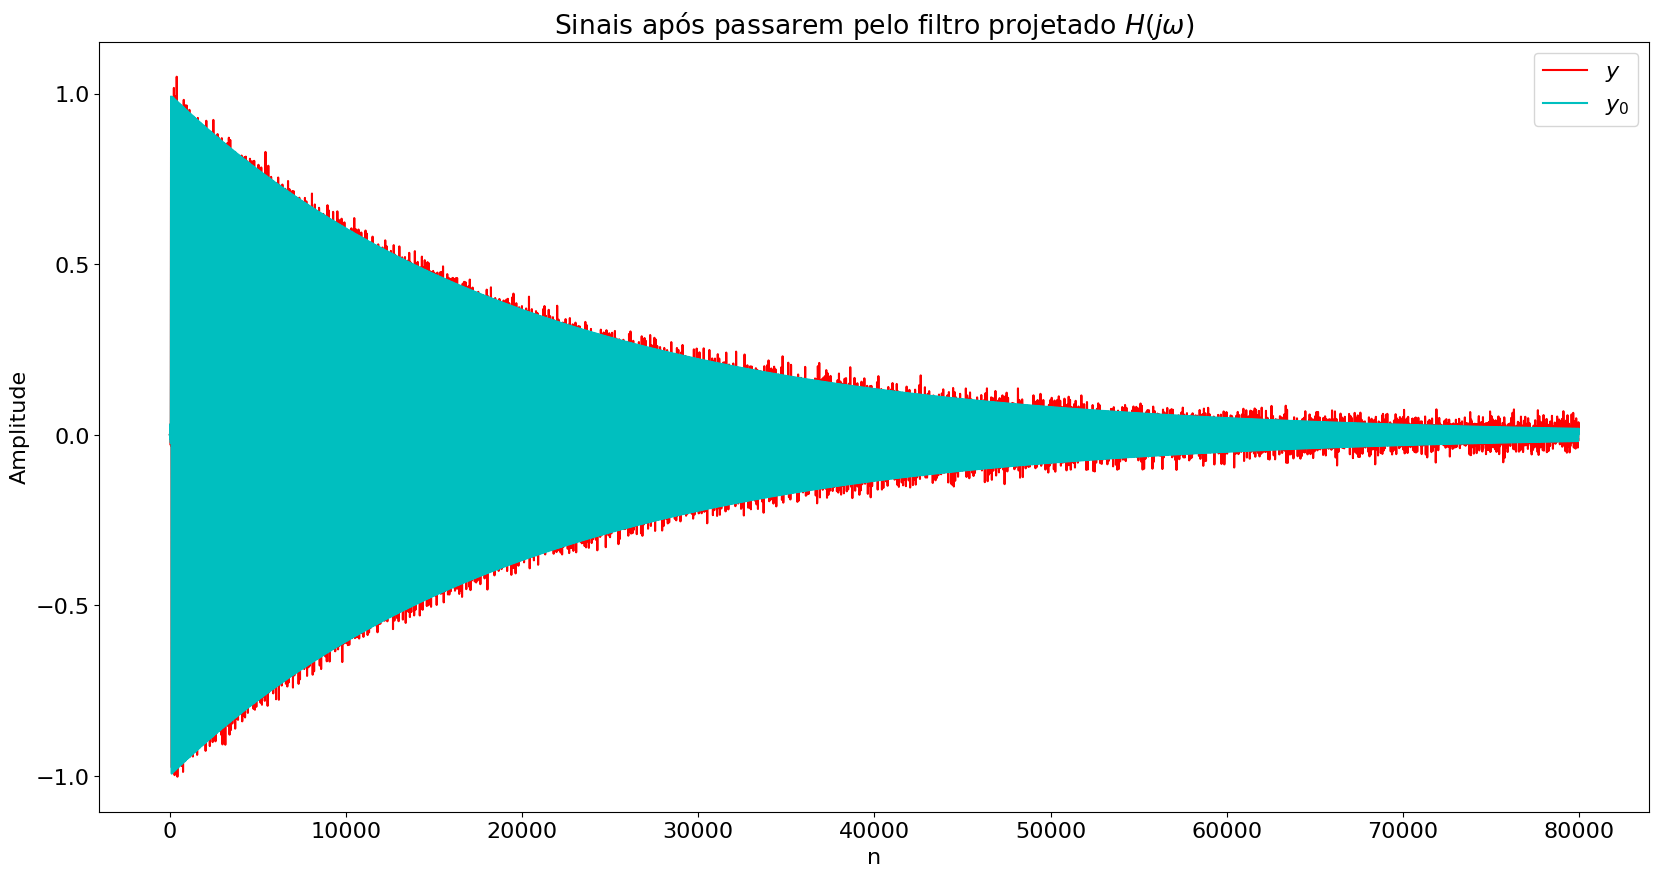

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(range(0, x0.shape[0]), y, 'r', label=r"$y$")
plt.plot(range(0, x0.shape[0]), y0, 'c', label=r"$y_0$")

plt.title(r"Sinais após passarem pelo filtro projetado $H(j\omega)$")

plt.ylabel(r'Amplitude')
plt.xlabel("n")
plt.legend()

\

Áudio do filtro com o sinal $x_0$ após passar pelo filtro projetado $h[n]$

In [ ]:
Audio(y0, rate=40000, autoplay=True)

Áudio do sinal ruidoso ($x$) após passar pelo filtro projetado $h[n]$

In [ ]:
Audio(y, rate=40000, autoplay=True)

## Item e)

**e)** Explique porque x[n] e y[n] não são processos estacionários em nenhum sentido,
mas os ruídos vx[n] = x[n]−x0[n] e vy[n] = y[n]−y0[n] são estacionários no sentido amplo
(no caso de vy[n], desprezando-se o transitório do filtro)

A seguir, gráficos comprovando a afirmação para vx e vy

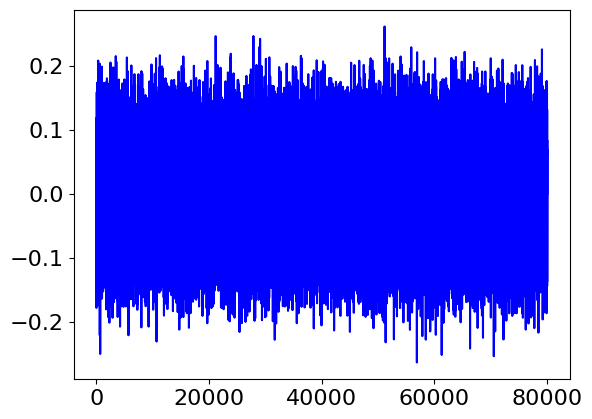

In [ ]:
vx = x - x0
plt.plot(range(0, x0.shape[0]), vx, 'b')

Como podemos ver no primeiro gráfico , Vx = X[n] - x0[n] é igual ao próprio ruido de entrada, pois estamos descartando apenas  a entrada não ruidosa X0.Desse modo, como vx é  um ruido branco gaussiano, por definição as propriedades probabilísticas desse sinal devem ser invariantes pelo tempo.  

Assim, sabendo que conceitualmente para um processo ser dito como estacionário as suas características não devem variar com o tempo, podemos afirmar que Vx é um processo estacionário, IID e WSS.

Contudo, é importante reforçar que o sinal x0, assim como sua contraparte ruidosa X, não podem ser considerados como processos estácionários.
Sabemos que, para t >0,  $$ x0 = sin3(Ωt)* e^{ - t/
τ} $$ ou seja , x0 decai exponencialmente com o tempo, o que torna a propriedade de amplitude do sinal variante em relação ao tempo e, consequentemente, não estacionário. De modo análogo, como X é a soma do ruído branco (estacionário) com X0 (não estacionário e que decai com o tempo), o resultado X também é estacionário.


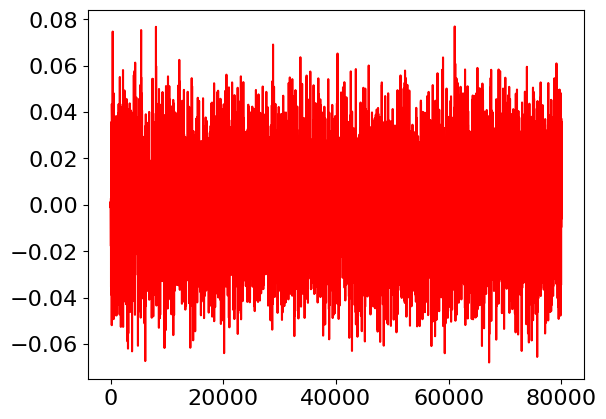

In [ ]:
vy = y - y0
plt.plot(range(0, x0.shape[0]), vy, 'r')

no seguinte caso Vy[n], por ser uma filtragem tipo SLIT do sinal Vx - justificado anteriormente como IID e WSS -  pode-se concluir que Vy também será um processo estacionário

## Item f)

**f)** Calcule a expressão teórica da densidade espectral de potência do ruído na entrada
e na saída, bem como a potência do ruído na entrada e na saída

Para se achar o valor da densidade espectral de potência, devemos aplicar a transformada de Fourier na função de autocorrelação do sinal.
Sendo o ruído branco um sinal constante em todo o dominio do tempo, sua
densidade espectral de potência na **entrada** é constante e dada como:

$$ S(jω)  = A= \sigma^2 = 0.06^2 = 0.0036$$

Além disso, também sabemos que a autocorrelação é a Transformada de Fourier Inversa de S(jω), o que gera:
$$ R(t) =   L^{(-1)} A = Aδ(t)= \sigma^2*δ(t)$$ 
Como a Potência do ruído também pode ser dado como P = R(0), temos:
$$ P = R(0) =  \sigma^2δ(0)= \sigma^2 = 0.0036$$ 

densidade espectral de potência na **saída** :
Sendo  y o sinal tratado por um filtro SLIT, concluímos que sua densidade espectral de potência será dado como :
$$ S_y(jω) = |H(jω)^2| * S_x(jω) $$
Analisando a contribuição do sinc na frequência, vemos que H(jω)^2 = 1 e
$$ S_y(jω) =   S_x(jω) = 0.0036 $$

Como o sinc atua como um filtro passa baixas real, podemos aproximar a sua contribuição como um passa baixas ideal, de modo que o calculo de sua potência de **saída** será
$$ P = r_{vy}[0] = S_y(jω)*Largura_{filtro} = \frac{1}{2\pi} \cdot \sigma^2 \int^{+0.1\pi}_{-0.1\pi} 1^2 d\omega = 0.1\cdot 0.0036 = 0.00036 $$


# Item g)

**g)** Meça experimentalmente a potência média do ruído em x[n] e em y[n] por duas
maneiras:

**(a)** Calculando $r_{v_x} $[0] e $r_{v_y} $[0] pela média de diversas realizações dos processos.

$$ r_{v_x}[0] = \frac{1}{L} \sum^{L}_{l = 1} (v_x^{(l)})^2$$

Calcule a expressão para todos os valores de $n$, e veja se eles são **aproximadamente** constantes ou não.


In [ ]:
N, L = 1000, 1000

In [ ]:
# Recalculando x_0 para a nova quantidade N:

n = np.arange(0, N)

x0 = np.zeros(N)
for i in range(len(n)): # Preenchendo o xo
  x0[i] = ((math.sin(omega*n[i]))**3)*np.e**(-n[i]/tau)

In [ ]:
soma_vx = np.zeros(N)
soma_vy = np.zeros(N)


for i in range (1, L):  # somatorio com L = 1000

  X = np.random.normal(loc=0.0, scale=var, size=(N))

  vx = X # ruido
  x = X + x0 # sinal soma ruidosa

  y0 = scipy.signal.lfilter(hf.num, hf.den, x0)
  y = scipy.signal.lfilter(hf.num, hf.den, x) # filtro ruidoso

  vy = y - y0

  soma_vx += vx**2
  soma_vy += vy**2


r_vx = soma_vx/L
r_vy = soma_vy/L

r_vx_1_media = np.mean(r_vx) * np.ones(N)

In [ ]:
n = np.arange(0, N)

**(b)**  Usando o fato dos ruídos serem ergódicos, ou seja, usando a expressão

$$ r_{v_x}[0] = \frac{1}{N} \sum^{N-1}_{n=0} (v_x^{(l)})^2$$

em que agora $ l $ corresponde a **uma realização qualquer do ruído**, e N é o comprimento do sinal.

In [ ]:
Xb = np.random.normal(loc=0.0, scale=var, size=(N)) 
#Obs: o indice b é para indicar que essas variaveis tratam do item b

vxb = Xb # ruido
xb = X + x0 # sinal soma ruidosa
yb = scipy.signal.lfilter(hf.num, hf.den, xb) # filtro ruidoso
vyb = yb - y0


soma_vxb = 0
soma_vyb = 0

for i in range(0, N-1):
  soma_vxb += vxb[i]**2
  soma_vyb += vyb[i]**2

r_vxb = soma_vxb/N
r_vyb = soma_vyb/N

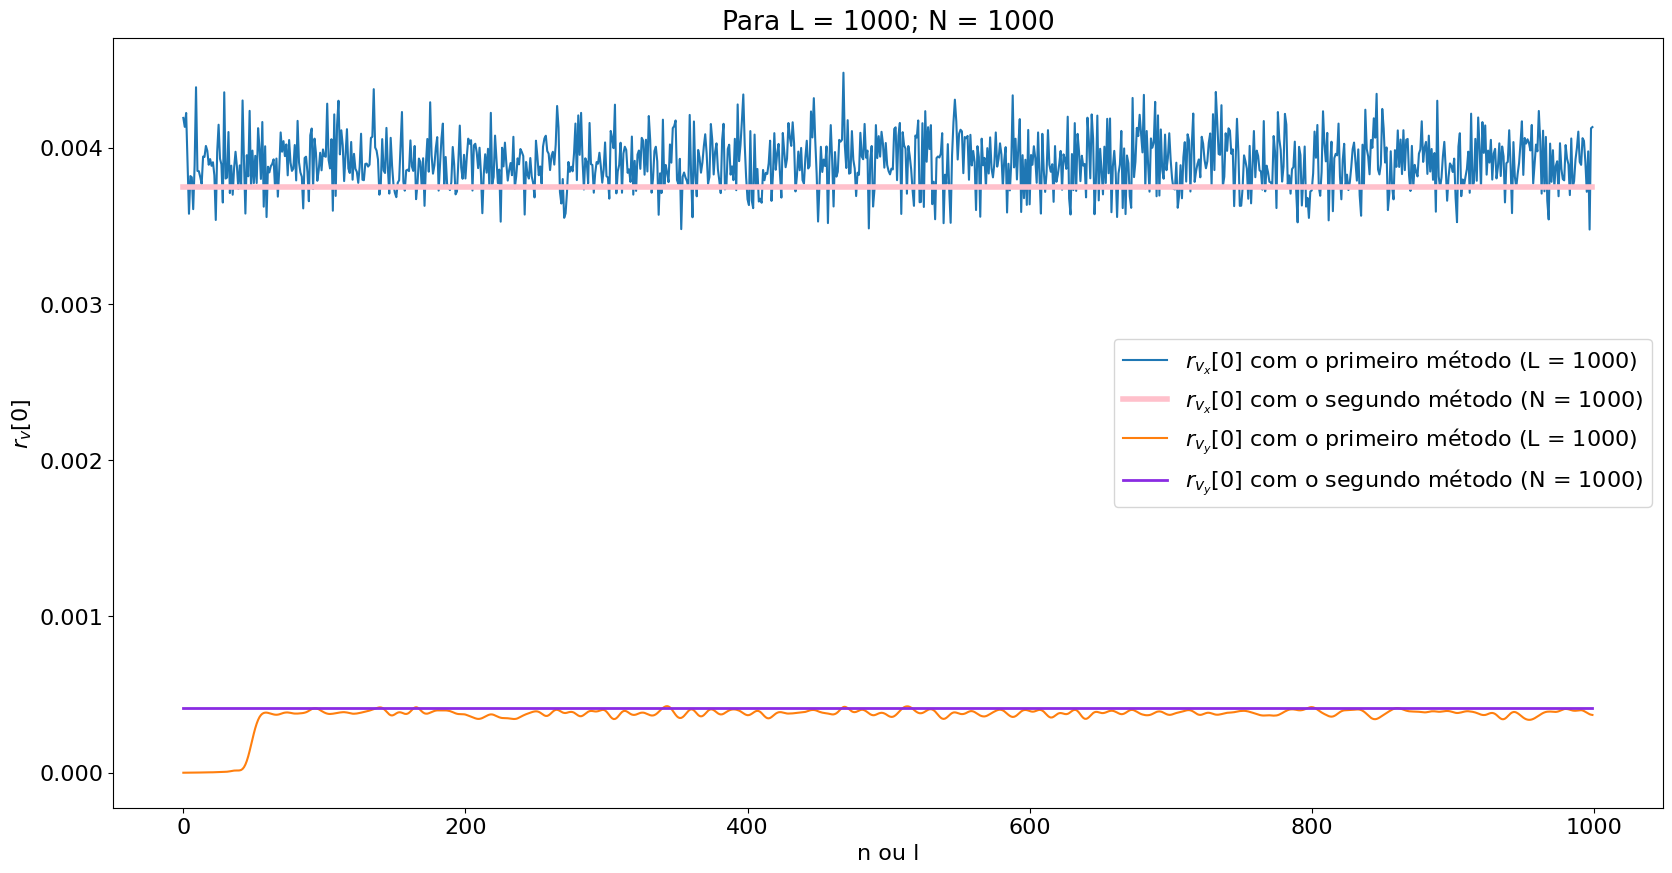

In [ ]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 16})
plt.plot(n, r_vx, label=r"$r_{v_x}[0]$ com o primeiro método (L = 1000)")


plt.title("Para L = 1000; N = 1000")
plt.ylabel(r'$r_{v}[0]$')
plt.xlabel("n ou l")
#plt.ylim([0, 0.01])

plt.plot(n, r_vxb*np.ones(N), label=r"$r_{v_x}[0]$ com o segundo método (N = 1000)", color="pink", linewidth=4)


plt.plot(n, r_vy, label=r"$r_{v_y}[0]$ com o primeiro método (L = 1000)")
plt.plot(n, r_vyb*np.ones(N), label=r"$r_{v_y}[0]$ com o segundo método (N = 1000)", color="blueviolet", linewidth=2)

plt.legend()
plt.show()

## N = L = 10000

In [ ]:
N, L = 10000, 10000

In [ ]:
n = np.arange(0, N)

x0 = np.zeros(N)
for i in range(len(n)): # Preenchendo o xo
  x0[i] = ((math.sin(omega*n[i]))**3)*np.e**(-n[i]/tau)

In [ ]:
soma_vx = np.zeros(N)
soma_vy = np.zeros(N)


h = 0.1 * np.sinc(0.1 * (n - 50)) # Calcula os valores de h
hf = signal.TransferFunction(h, [1])

for i in range (1, L): 
  
  X = np.random.normal(loc=0.0, scale=var, size=(N))

  vx = X # ruido
  x = X + x0 # sinal soma ruidosa

  y0 = scipy.signal.lfilter(hf.num, hf.den, x0)
  y = scipy.signal.lfilter(hf.num, hf.den, x) # filtro ruidoso

  vy = y - y0

  soma_vx += vx**2
  soma_vy += vy**2


r_vx = soma_vx/L
r_vy = soma_vy/L

r_vx_1_media = np.mean(r_vx) * np.ones(N)

n = np.arange(0, N)

Xb = np.random.normal(loc=0.0, scale=var, size=(N)) 
#Obs: o indice b é para indicar que essas variaveis tratam do item b

vxb = Xb # ruido
xb = X + x0 # sinal soma ruidosa
yb = scipy.signal.lfilter(hf.num, hf.den, xb) # filtro ruidoso
vyb = yb - y0


soma_vxb = 0
soma_vyb = 0

for i in range(0, N-1):
  soma_vxb += vxb[i]**2
  soma_vyb += vyb[i]**2

r_vxb = soma_vxb/N
r_vyb = soma_vyb/N

KeyboardInterrupt: ignored

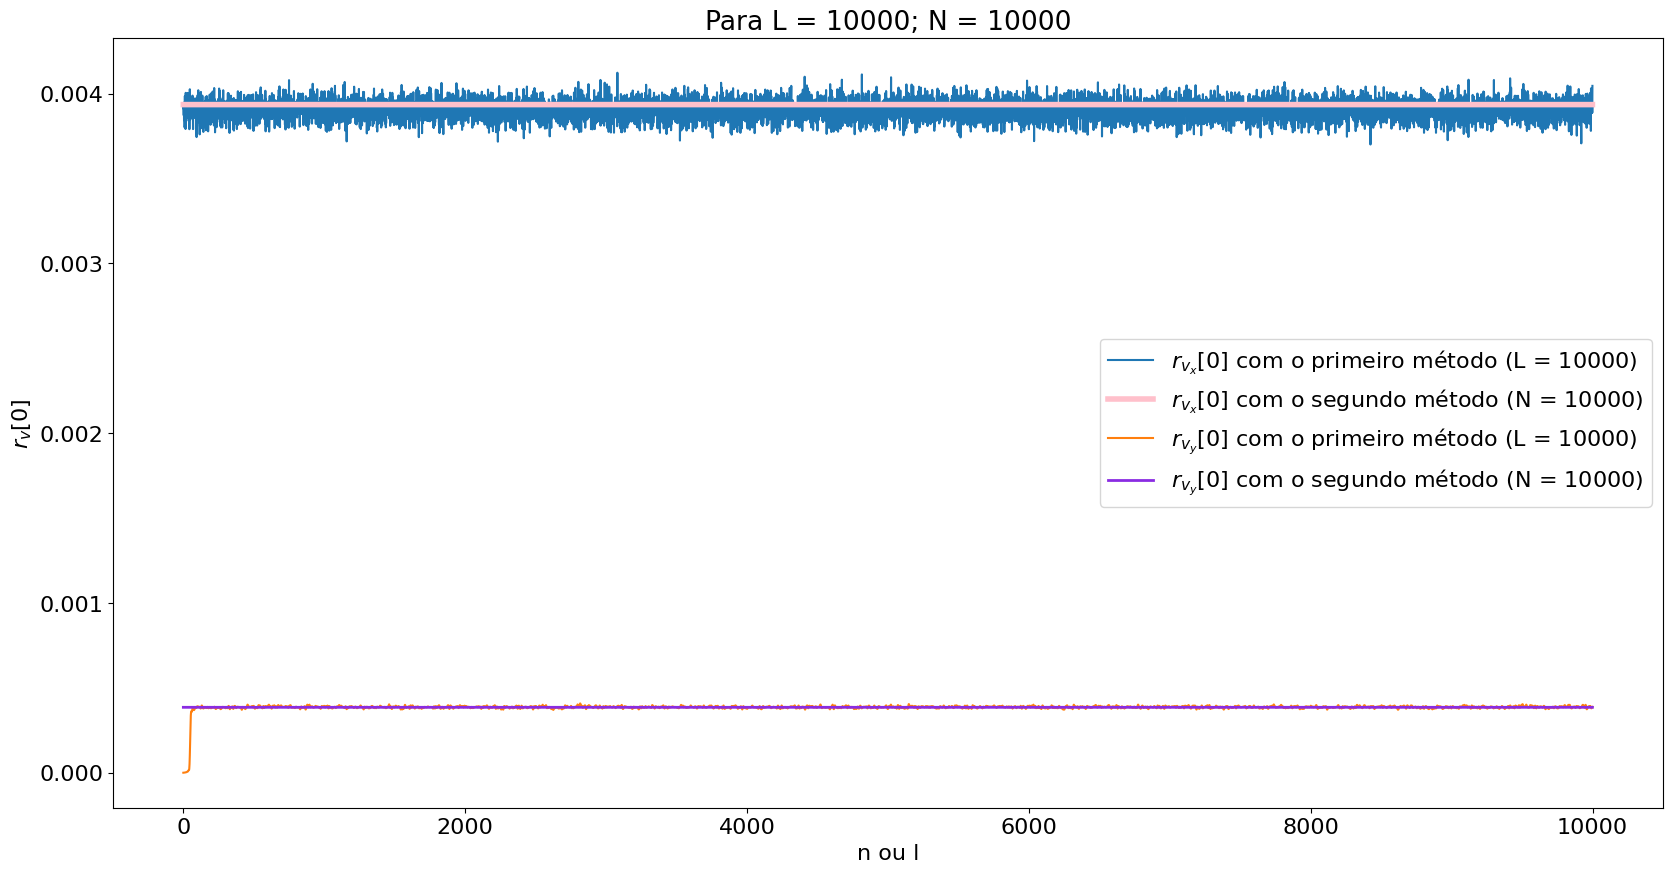

In [ ]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 16})
plt.plot(n, r_vx, label=r"$r_{v_x}[0]$ com o primeiro método (L = 10000)")


plt.title("Para L = 10000; N = 10000")
plt.ylabel(r'$r_{v}[0]$')
plt.xlabel("n ou l")
#plt.ylim([0, 0.01])

plt.plot(n, r_vxb*np.ones(N), label=r"$r_{v_x}[0]$ com o segundo método (N = 10000)", color="pink", linewidth=4)


plt.plot(n, r_vy, label=r"$r_{v_y}[0]$ com o primeiro método (L = 10000)")
plt.plot(n, r_vyb*np.ones(N), label=r"$r_{v_y}[0]$ com o segundo método (N = 10000)", color="blueviolet", linewidth=2)

plt.legend()
plt.show()

## N = L = 100.000

In [ ]:
N, L = 100000, 100000

In [ ]:
n = np.arange(0, N)

x0 = np.zeros(N)
for i in range(len(n)): # Preenchendo o xo
  x0[i] = ((math.sin(omega*n[i]))**3)*np.e**(-n[i]/tau)

In [ ]:
soma_vx = np.zeros(N)
soma_vy = np.zeros(N)


h = 0.1 * np.sinc(0.1 * (n - 50)) # Calcula os valores de h
hf = signal.TransferFunction(h, [1])

soma_vx = 0
soma_vy = 0

for i in range(L):
    X = np.random.normal(loc=0.0, scale=var, size=(N))
    vx = X  # ruido
    x = X + x0  # sinal soma ruidosa
    y0 = scipy.signal.lfilter(hf.num, hf.den, x0)
    y = scipy.signal.lfilter(hf.num, hf.den, x)  # filtro ruidoso
    vy = y - y0
    soma_vx += np.var(vx)
    soma_vy += np.var(vy)

var_vx = soma_vx / L
var_vy = soma_vy / L

r_vx = soma_vx/L
r_vy = soma_vy/L

r_vx_1_media = np.mean(r_vx) * np.ones(N)

n = np.arange(0, N)

Xb = np.random.normal(loc=0.0, scale=var, size=(N)) 
#Obs: o indice b é para indicar que essas variaveis tratam do item b

vxb = Xb # ruido
xb = X + x0 # sinal soma ruidosa
yb = scipy.signal.lfilter(hf.num, hf.den, xb) # filtro ruidoso
vyb = yb - y0


soma_vxb = 0
soma_vyb = 0

for i in range(0, N-1):
  soma_vxb += vxb[i]**2
  soma_vyb += vyb[i]**2

r_vxb = soma_vxb/N
r_vyb = soma_vyb/N

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


In [ ]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 16})
plt.plot(n, r_vx, label=r"$r_{v_x}[0]$ com o primeiro método (L = 100000)")


plt.title("Para L = 100000; N = 100000")
plt.ylabel(r'$r_{v}[0]$')
plt.xlabel("n ou l")


plt.plot(n, r_vxb*np.ones(N), label=r"$r_{v_x}[0]$ com o segundo método (N = 100000)", color="pink", linewidth=4)


plt.plot(n, r_vy, label=r"$r_{v_y}[0]$ com o primeiro método (L = 100000)")
plt.plot(n, r_vyb*np.ones(N), label=r"$r_{v_y}[0]$ com o segundo método (N = 100000)", color="blueviolet", linewidth=2)

plt.legend()
plt.show()

## Conclusão: item g


**Compare os resultados obtidos com as duas expressões entre si e com o valor teórico. Os resultados ficam mais próximos quando os valores de N e L são aumentados para 10.000? Para 100.000?**

Não foi possível fazer a verificação para N = L = 100.000, devido a alta demora que o algoritmo apresentou para rodar este caso. No entanto, comparando os outros casos, nota-se que as duas expressões se aproximam cada vez mais quanto maior o valor de N e de L. 

Além disso, tanto $r_{v_x}$[0] quanto $r_{v_y}$[0] se aproximaram dos valores de potência teóricos calculados anteriormente no **item f)**, validando experimentalmente os dois métodos para obter a potência média do ruído.